In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from bs4 import SoupStrainer
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Scraping from a Dog Adoption website!

https://homeatlastdogrescue.com/adoptable/ is a website that has a number of puppies that are available for adoption.

In [4]:
r = requests.get("https://homeatlastdogrescue.com/adoptable/")

In [5]:
soup = BeautifulSoup(r.text, 'html.parser')

## Goal 1: plot a pie chart with the percent of male and female dogs that are up for adoption. 


In [6]:
urls = soup.find_all("a", class_ = "details")
len(urls), urls[:5]

(89,
 [<a class="details" href="dog_desc.php?ID=11060" rel="dog_desc.php?ID=11060" title="Dog Detail"><h1>** SAVE A LIFE **</h1></a>,
  <a class="details" href="dog_desc.php?ID=9655" rel="dog_desc.php?ID=9655" title="Dog Detail"><h1>*HELP Vagabond*</h1></a>,
  <a class="details" href="dog_desc.php?ID=5632" rel="dog_desc.php?ID=5632" title="Dog Detail"><h1>Alexander</h1></a>,
  <a class="details" href="dog_desc.php?ID=11061" rel="dog_desc.php?ID=11061" title="Dog Detail"><h1>Beau</h1></a>,
  <a class="details" href="dog_desc.php?ID=11229" rel="dog_desc.php?ID=11229" title="Dog Detail"><h1>Betty</h1></a>])

In [7]:
fetch_urls = []
for x in urls:
    base_url = 'https://homeatlastdogrescue.com/adoptable/'
    url_str = str(x)
    start = url_str.index('dog_desc')
    end = url_str.index('" rel')
    new_url = url_str[start : end]
    new_url = new_url.strip()
    request_url = base_url + new_url
    fetch_urls.append(request_url)

In [8]:
fetch_urls = fetch_urls[1:]

In [9]:
header_texts = []
dog_soups = []
for x in fetch_urls:
    r = requests.get(x)
    soup = BeautifulSoup(r.text, 'html.parser')
    dog_soups.append(soup)
for x in dog_soups:
    header = x.find('h3').get_text()
    header_texts.append(header)

In [10]:
header_texts[:5]

['Young Male Greater Swiss Mountain Dog',
 'Adult Male Shepherd/Australian Shepherd mix\r\n',
 'Young Male Bulldog',
 'Young Female Pit Bull Terrier',
 'Senior Male Chihuahua/Poodle mix\r\n']

In [11]:
genders = []
for x in header_texts:
    split_header = x.split(' ')
    gender = split_header[1]
    genders.append(gender)

In [12]:
dogs = pd.DataFrame({ "Dog" : header_texts, "Gender" : genders})
dogs

,Dog,Gender
0,Young Male Greater Swiss Mountain Dog,Male
1,Adult Male Shepherd/Australian Shepherd mix\r\n,Male
2,Young Male Bulldog,Male
3,Young Female Pit Bull Terrier,Female
4,Senior Male Chihuahua/Poodle mix\r\n,Male
5,Senior Female Chihuahua,Female
6,Adult Male Pit Bull Terrier,Male
7,Young Male Wirehaired Terrier,Male
8,Young Female Australian Shepherd,Female
9,Baby Hound,


In [13]:
grouped_genders = dogs.groupby(['Gender'], as_index = False)

In [14]:
dogs_by_gender = grouped_genders.agg({'Dog' : 'count'})
dogs_by_gender = dogs_by_gender.rename(columns = {"Dog" : "number"})

In [15]:
male_vs_female = dogs_by_gender[np.logical_or(dogs_by_gender['Gender'] == 'Female', dogs_by_gender['Gender'] == 'Male')]

In [16]:
male_vs_female

,Gender,number
1,Female,32
2,Male,54


Text(0.5,1,'Percentages of Male and Female Dogs for Adoption')

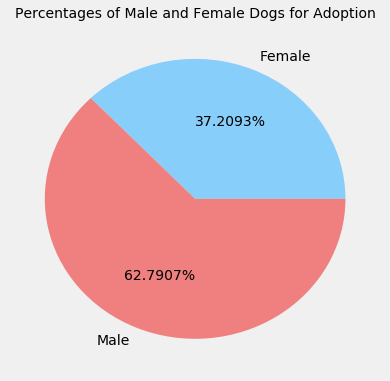

In [17]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (6,6))
sizes = male_vs_female['number']
labels = male_vs_female['Gender']
colors = ["lightskyblue", "lightcoral"]
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.4f%%')
plt.title('Percentages of Male and Female Dogs for Adoption', size = 'medium')

## Goal 2: plot a graph that represents the number of adoptable dogs by breed. For this question please consider the complete breed. 

In [18]:
header_texts[:5]

['Young Male Greater Swiss Mountain Dog',
 'Adult Male Shepherd/Australian Shepherd mix\r\n',
 'Young Male Bulldog',
 'Young Female Pit Bull Terrier',
 'Senior Male Chihuahua/Poodle mix\r\n']

In [19]:
breeds = []
for x in header_texts:
    split_header = x.split() #splitting the header with all the info we want
    split_breed = split_header[2:]
    breed = ' '.join(split_breed)
    breeds.append(breed)

In [20]:
len(np.unique(breeds))

43

In [21]:
dogs['breed'] = breeds

In [22]:
dogs[:5]

,Dog,Gender,breed
0,Young Male Greater Swiss Mountain Dog,Male,Greater Swiss Mountain Dog
1,Adult Male Shepherd/Australian Shepherd mix\r\n,Male,Shepherd/Australian Shepherd mix
2,Young Male Bulldog,Male,Bulldog
3,Young Female Pit Bull Terrier,Female,Pit Bull Terrier
4,Senior Male Chihuahua/Poodle mix\r\n,Male,Chihuahua/Poodle mix


In [23]:
grouped_breeds = dogs.groupby(['breed'], as_index = False)

In [24]:
dogs_by_breed = grouped_breeds.agg({'Dog' : 'count'})
dogs_by_breed = dogs_by_breed.rename(columns = {'Dog' : 'number'})

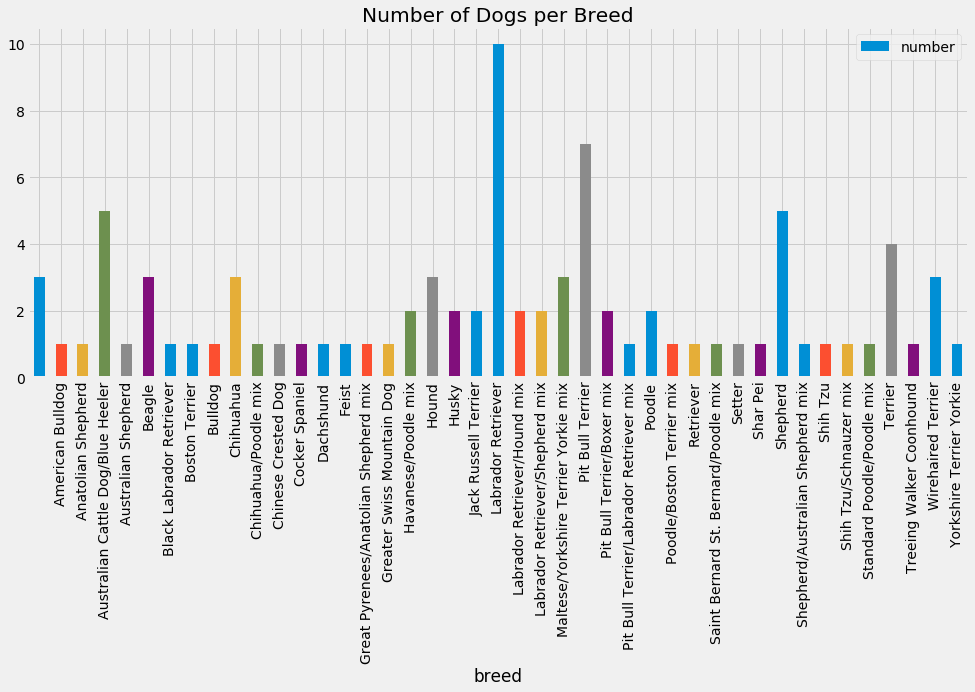

In [25]:
dogs_by_breed.plot.bar(x = 'breed', y = 'number', figsize = (15,6), title = 'Number of Dogs per Breed')


#### How many Labradors are up for adoption?

In [26]:
labradors = dogs[dogs['breed'].str.contains('Labrador')]
labradors_percentage = len(labradors) / len(dogs)
print('There are ' + str(len(labradors)) + ' Labradors up for adoption.')
print('The Labradors constitute ' + str(labradors_percentage) + ' percent of the adoptable dogs.')

There are 16 Labradors up for adoption.
The Labradors constitute 0.18181818181818182 percent of the adoptable dogs.


#### How many Chihuahuas?

In [27]:
chihuahuas = dogs[dogs['breed'].str.contains('Chihuahua')]
chihuahuas_percentage = len(chihuahuas) / len(dogs)

print('There are ' + str(len(chihuahuas)) + ' Chihuahuas up for adoption.')
print('The Chihuahuas constitute ' + str(chihuahuas_percentage) + ' percent of the adoptable dogs.')

There are 4 Chihuahuas up for adoption.
The Chihuahuas constitute 0.045454545454545456 percent of the adoptable dogs.


In [28]:
print('Together, the Labs and Chihuahuas constitute ' + str(labradors_percentage + chihuahuas_percentage) + ' percent of the adoptable dogs.')

Together, the Labs and Chihuahuas constitute 0.2272727272727273 percent of the adoptable dogs.


## Scraping from the American Kennel Club for Official Dog Breeds

http://www.akc.org/dog-breeds/?letter=A

In [29]:
r = requests.get('https://www.akc.org/dog-breeds/?letter=A')
soup = BeautifulSoup(r.text, 'html.parser')

In [30]:
akc = soup.find_all('option')

In [31]:
akc = akc[1:]

In [32]:
akc_breeds = []
for x in akc:
    akc_breeds.append(x.get_text())

In [33]:
recognized_breeds = pd.DataFrame({'AKC Breeds' : akc_breeds})

In [34]:
recognized_breeds.head(20)

,AKC Breeds
0,Affenpinscher
1,Afghan Hound
2,Airedale Terrier
3,Akita
4,Alaskan Malamute
5,American English Coonhound
6,American Eskimo Dog
7,American Foxhound
8,American Hairless Terrier
9,American Leopard Hound


In [35]:
# merging the AKC dogs df with the dogs-grouped-by-breed df
adoptable_akc = pd.merge(recognized_breeds, dogs_by_breed, left_on= "AKC Breeds", right_on = "breed", how = 'inner')

In [36]:
adoptable_akc.head()

,AKC Breeds,breed,number
0,Australian Shepherd,Australian Shepherd,1
1,Australian Shepherd,Australian Shepherd,1
2,Australian Shepherd,Australian Shepherd,1
3,Beagle,Beagle,3
4,Beagle,Beagle,3


In [37]:
# removing duplicate rows
adoptable_akc = adoptable_akc.drop_duplicates(subset=['breed'], keep='first')

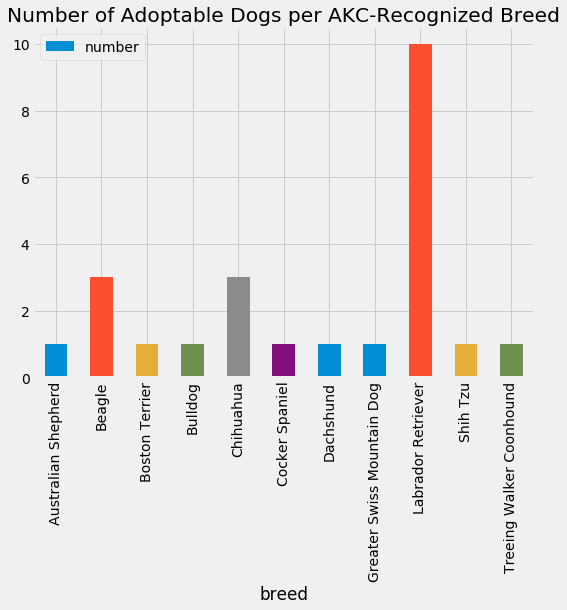

In [38]:
adoptable_akc.plot.bar(x = 'breed', y = 'number', figsize = (8,6), title = 'Number of Adoptable Dogs per AKC-Recognized Breed')

- We can see that, of the officially recognized breeds, the Labrador Retriever shows up most commonly among the adoptable dogs.